====== total squared error = 42.34023449210218


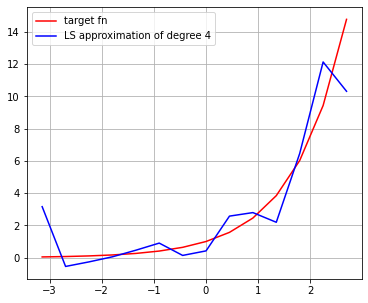

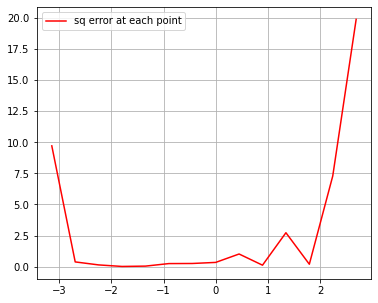

In [140]:
# Prob 2, HW8
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline 
# interactive plot
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

##
def compute_coefs(target_fn=np.exp, n=4, m=None):
    """ compute coefficients a_k, b_k, stored 
    as vectors, via Thm 8.13 in Burden/Faires. 
    For a degree n of Discrete Trig Polynomial
    Approximation to target_fn, using m queries.
    """
    if m is None:
        # textbook's choice, also seems to be a popular choice
        # in student solutions
        m = 2 * n - 1
    left = -np.pi
    right = np.pi
    # assign grid
    grid = np.linspace(left, right, 2*m+1)
    # query indices
    idx = np.arange(2*m+1)
    assert grid[0] == left and grid[::-1][0] == right
    query_points = target_fn(grid)
    # get coefs
    # preallocate
    # a1, a2, ... an-1 (a0, an computed separately)
    a_coef = np.array([(1/m)*np.sum([np.multiply(query_points[0:2*m], np.cos((k)*grid[0:2*m]))]) for 
                       k in np.arange(n-1)+1])
    # b1, b2, ... bn-1
    b_coef = np.array([(1/m)*np.sum([np.multiply(query_points, np.sin((k)*grid))]) for k in np.arange(n-1)+1])
    a0 = (1/m) * np.sum(query_points[0:2*m])
    an = (1/m) * np.sum(np.multiply(query_points[0:2*m], np.cos(n * grid[0:2*m])))
    a_coef = np.append(a0, a_coef)
    a_coef = np.append(a_coef, an)
    return grid, a_coef, b_coef

def approximate(target_fn=np.exp, n=4, m=None, verbose=True):
    """ uses a degree n discrete least sq. trig polynomial 
    to approximate target_fn, with 2*m queries. Returns sq error
    on each query point.
    
    If verbose, plot approximate and error.
    """
    # find coefs
    grid, a_coef, b_coef = compute_coefs(target_fn, n, m)
    a_coef_short = a_coef[1:len(a_coef)-1] # a1, a2, ... an-1 only
    assert len(a_coef_short) == len(b_coef)
    # assemble polynomial
    S_n = lambda x: (a_coef[0]/2) + (a_coef[::-1][0]*np.cos(n*x)) + \
                np.sum([a_coef_short[k]*np.cos((k+1)*x) + \
                        b_coef[k]*np.sin((k+1)*x) for k in np.arange(n-1)])
    # evaluate at gri point
    approximated = np.array([S_n(x_j) for x_j in grid[0:len(grid)-1]])
    # compute final sq error
    query = target_fn(grid)[0:len(grid)-1]
    plot_grid = grid[0:len(grid)-1]
    sq_error = np.sum((query - approximated)**2)
    if verbose:
        # plot 
        plt.figure(1, figsize=(6,5));
        plt.plot(plot_grid, query, color='red', \
                 label="target fn");
        plt.plot(plot_grid, approximated, color='blue', \
                 label='LS approximation of degree {}'.format(n));
        plt.grid(); plt.legend();
        # plot error
        plt.figure(2, figsize=(6,5));
        plt.plot(plot_grid, (query-approximated)**2, color='red', \
                 label="sq error at each point");
        plt.grid(); plt.legend();
    return sq_error
error = approximate(n=4, verbose=True)
print("====== total squared error = {}".format(error))

In [148]:
interact(lambda n, m: print("==== using n = {}, m = {}, final sq. error = ".format(n, m), \
                            approximate(np.exp, n, m, verbose=True)), \
         n=(1,20), m=(2,100));

interactive(children=(IntSlider(value=10, description='n', max=20, min=1), IntSlider(value=51, description='m'…

In [149]:
compute_coefs()

(array([-3.14159265, -2.6927937 , -2.24399475, -1.7951958 , -1.34639685,
        -0.8975979 , -0.44879895,  0.        ,  0.44879895,  0.8975979 ,
         1.34639685,  1.7951958 ,  2.24399475,  2.6927937 ,  3.14159265]),
 array([ 5.82532985, -2.15048477, -0.05134437,  0.77977417, -1.07202048]),
 array([ 3.55350809, -2.69329961,  1.82801647]))